**Mc Donald's Marget Segmentation**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data set Importing**

In [5]:
LOC = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
df = pd.read_csv(LOC)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.shape

(1453, 15)

**Encoding Catagoriacal Data**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
enc = LabelEncoder()
print(df.columns)
for clm in df.columns[0:11]:
  df[clm] = enc.fit_transform(df[clm])
df

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


Mean Review

In [9]:
dis = []
for i in range(11):
  dis.append([df.columns[i], round(df.iloc[:, i].mean()*100, 2)])

pd.DataFrame(dis, columns = ["Catagory", "Percentage"])

,Catagory,Percentage
0,yummy,55.26
1,convenient,90.78
2,spicy,9.36
3,fattening,86.72
4,greasy,52.65
5,fast,90.02
6,cheap,59.88
7,tasty,64.42
8,expensive,35.79
9,healthy,19.89




1.   around 90% people finds McD Convenient and Fast
2.   



**Feature Extracting**

In [10]:
X = df.iloc[: , :11].values
X

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

**Finding Optimal Clusters**

In [11]:
from sklearn.cluster import KMeans
km28 = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, max_iter=1000, n_init = 10).fit(X)
  km28[k] = kmeans

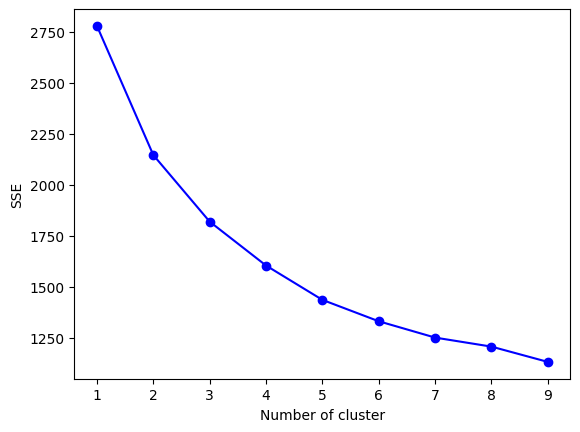

In [12]:
temp = []
for kms in km28.values():
    temp.append(kms.inertia_)

plt.figure()
plt.plot(list(km28.keys()), list(temp), 'bo-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

By Elbo method optimal clusters = 4

**PCA**

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pcaData = pca.fit_transform(df.iloc[:, :11])

In [14]:
pcadf = pd.DataFrame(data = pcaData, columns = ["PCA "+str(x) for x in range(1, 12)])

In [15]:
pcadf

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [16]:
pcadf.describe()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11
count,1.453000e+03,1453.000000,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-2.689597e-17,0.000000,-6.785121e-17,4.034396e-17,1.833816e-17,-4.431723e-17,1.619871e-17,1.528180e-17,-5.165250e-17,8.007665e-17,-1.375362e-17
std,7.570495e-01,0.607456,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-0.356848,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-0.115163,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,0.391554,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


**Clustering (4 Clusters)**

In [17]:
clus = km28[4].predict(df.iloc[:, :11].values)
pd.DataFrame(clus)

,0
0,0
1,1
2,1
3,2
4,0
...,...
1448,3
1449,2
1450,1
1451,2


**Analysing Clusters**

In [18]:
from collections import Counter
cntr = Counter(clus)
cntr

Counter({0: 308, 1: 353, 2: 549, 3: 243})

In [19]:
for i in range(4):
  print(str(i)+" -> "+str(round(cntr[i]/len(clus)*100, 1))+"%")

0 -> 21.2%
1 -> 24.3%
2 -> 37.8%
3 -> 16.7%


In [20]:
data = [[0]*11 for i in range(4)]
for idx in range(len(clus)):
  for i in range(11):
    data[clus[idx]][i] += int(df.iloc[idx, i])
data

[[7, 275, 23, 285, 204, 293, 284, 47, 4, 22, 118],
 [301, 342, 45, 319, 198, 305, 37, 326, 291, 67, 35],
 [490, 538, 48, 433, 191, 528, 533, 540, 8, 185, 24],
 [5, 164, 20, 223, 172, 182, 16, 23, 217, 15, 176]]

Color scheme for segments 1, 2, 3, 4 is 'blue', 'orange', 'green', 'red' respectively

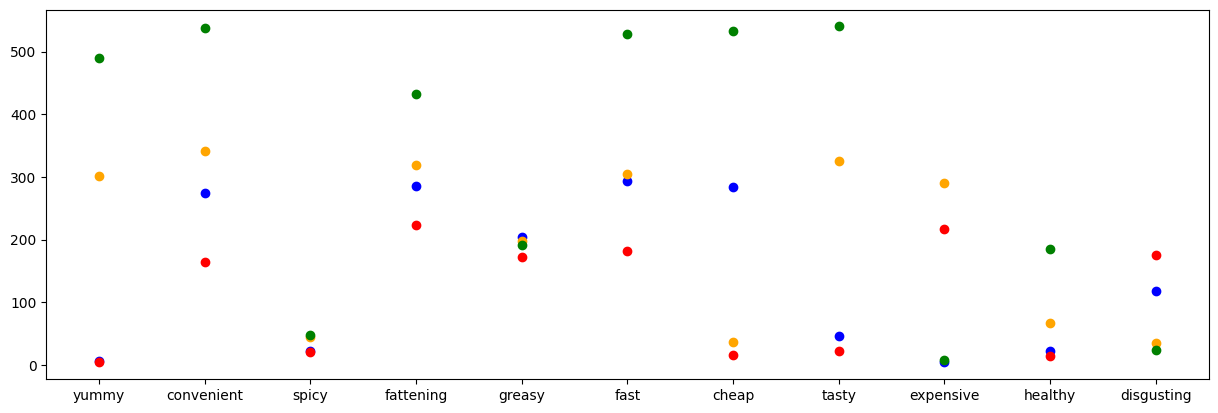

In [21]:
f = plt.figure()
clr = ['blue', 'orange', 'green', 'red']
f.set_figwidth(15)
for i in range(4):
  plt.scatter(list(df.columns)[:11], data[i], color = clr[i])

* Segment 3 have mostly positive review (Green)
* Segment 4 consist of most negative reviews (Red)
* Cannot draw a conclusion on Segment 1, 2

In [22]:
clusDf = [pd.DataFrame([], columns = df.columns) for i in range(4)]
for idx in range(len(clus)):
  clusDf[clus[idx]] = pd.concat([clusDf[clus[idx]], df.iloc[idx:idx+1, :]], axis=0)
for i in range(4):
  clusDf[i].head()

In [23]:
clusDf[0].head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
10,0,1,0,1,0,1,1,0,0,0,1,-2,53,Every three months,Female
12,0,1,0,1,0,1,1,0,0,0,0,0,65,Every three months,Male
28,0,1,0,0,0,1,0,0,0,0,0,0,55,Every three months,Male


In [24]:
dummyDict = dict()
for val in ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']:
  dummyDict[val] = 0
likeCountClus = []
for _ in range(4):
  likeCountClus.append(dummyDict.copy())
for clus in range(4):
  for idx in range(clusDf[clus].shape[0]):
    key = clusDf[clus].iloc[idx, :]['Like']
    if key in likeCountClus[clus]:
      likeCountClus[clus][key] += 1
    else:
      likeCountClus[clus][key] = 1
likeCountClus

[{'I hate it!-5': 54,
  '-4': 36,
  '-3': 34,
  '-2': 29,
  '-1': 25,
  '0': 53,
  '+1': 32,
  '+2': 31,
  '+3': 12,
  '+4': 2,
  'I love it!+5': 0},
 {'I hate it!-5': 5,
  '-4': 4,
  '-3': 6,
  '-2': 6,
  '-1': 10,
  '0': 37,
  '+1': 48,
  '+2': 64,
  '+3': 74,
  '+4': 52,
  'I love it!+5': 47},
 {'I hate it!-5': 4,
  '-4': 4,
  '-3': 2,
  '-2': 6,
  '-1': 10,
  '0': 42,
  '+1': 59,
  '+2': 85,
  '+3': 135,
  '+4': 106,
  'I love it!+5': 96},
 {'I hate it!-5': 89,
  '-4': 27,
  '-3': 31,
  '-2': 18,
  '-1': 13,
  '0': 37,
  '+1': 13,
  '+2': 7,
  '+3': 8,
  '+4': 0,
  'I love it!+5': 0}]

**analysing clusters based on reviews**

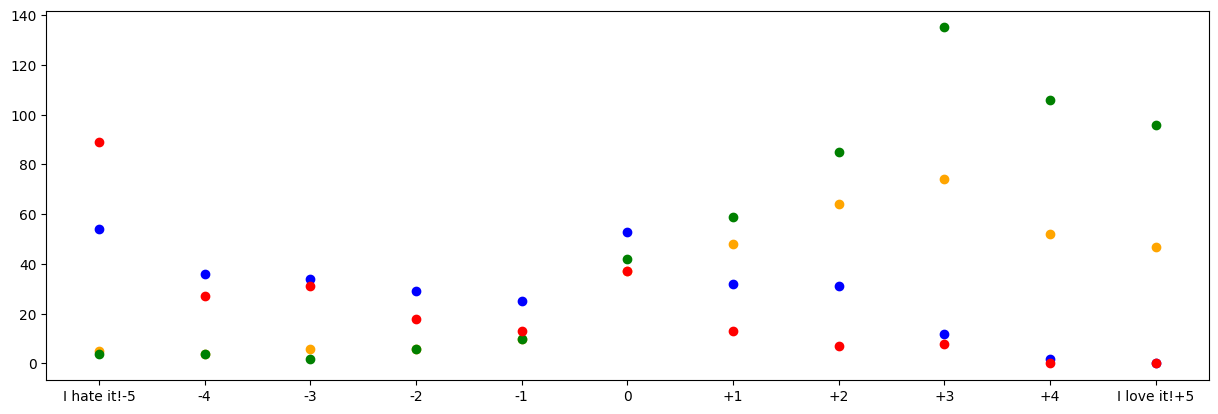

In [25]:
f = plt.figure()
f.set_figwidth(15)
for clus in range(4):
  plt.scatter(x = likeCountClus[clus].keys(), y = likeCountClus[clus].values(), color = clr[clus])

* Segment 3 have mostly positive review (Green)
* Segment 4 consist of most negative reviews (Red)
* Segment 1 consist mostly negative review (Blue)
* Segment 2 consist low positive reviews (Orange)

In [26]:
dummyDict = dict()
for val in df['Gender'].unique():
  dummyDict[val] = 0
genderCountClus = []
for _ in range(4):
  genderCountClus.append(dummyDict.copy())
for clus in range(4):
  for idx in range(clusDf[clus].shape[0]):
    key = clusDf[clus].iloc[idx, :]['Gender']
    genderCountClus[clus][key] += 1
genderCountClus

[{'Female': 183, 'Male': 125},
 {'Female': 173, 'Male': 180},
 {'Female': 331, 'Male': 218},
 {'Female': 101, 'Male': 142}]

**Analysing Gender of segment**

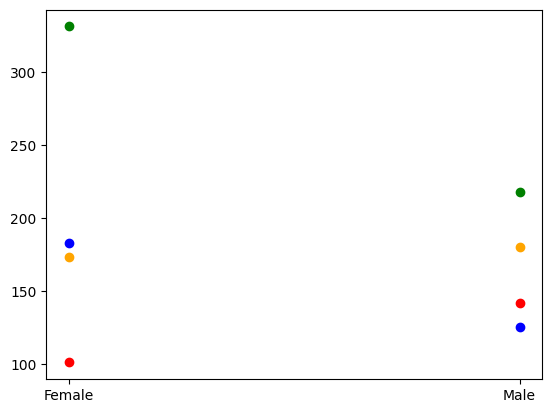

In [27]:
for clus in range(4):
  plt.scatter(x = genderCountClus[clus].keys(), y = genderCountClus[clus].values(), color = clr[clus])

* No conclusion can be drawn from gender data.




In [28]:
ageDataClus = []
for clus in range(4):
  cClus = clusDf[clus]
  taList = [cClus['Age'].mean(), cClus['Age'].median(), list(cClus['Age'].mode())]
  ageDataClus.append(taList)
ageDataClus

[[49.05844155844156, 52.0, [55, 59, 64]],
 [40.40793201133145, 39.0, [24, 55]],
 [43.397085610200364, 42.0, [23, 55]],
 [47.78600823045267, 49.0, [62]]]

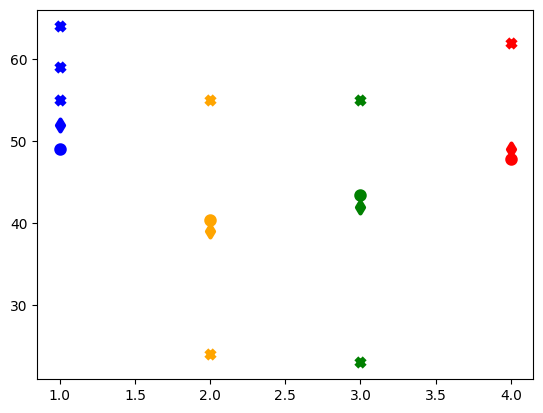

In [30]:
clr = ['blue', 'orange', 'green', 'red']
plts= ['o', 'd', 'x']
for i in range(4):
  for val in range(2):
    plt.scatter(x = [i+1], y = [ageDataClus[i][val]], marker = plts[val], color = clr[i], linewidths = 3)
  for val in ageDataClus[i][-1]:
    plt.scatter(x = [i+1], y = [val], marker = plts[-1], color = clr[i], linewidths = 4)

* Segment 4 and 1 hate McD, age group of these segments is 55 to 64
** aged people hate McD.
* Segment 3 and 2 Love McD, age group of these segments is 24 and median age of 40.
** Youth and Mid aged people love McD.
* Segments are independent of gender

**Segment 1 and 4 must be selected**